In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import RELACS as rel
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [228]:
%%R -o tpm_npc_batch tpm_esc_batch

### PERFORM BATCH CORRECTION USING LIMMA AND COMBAT  on TPM NORMALIZED COUNTS ###
libr = "/home/ferrari/R/x86_64-redhat-linux-gnu-library/3.5/"

library(limma, lib=libr)
library(sva, lib=libr)

tpm_npc = read.csv("../INPUT_DATA/counts_NPC48h_TPM_corrected.tsv", sep="\t")
row.names(tpm_npc) = tpm_npc$GeneID
tpm_npc$GeneID = NULL
colnames(tpm_npc) = c("NPC48h_DMSO_2","NPC48h_EPZ_2a",
                      "NPC48h_DMSO_4","NPC48h_EPZ_4a",
                      "NPC48h_DMSO_5","NPC48h_EPZ_5a")


tpm_esc = read.csv("../INPUT_DATA/counts_mESC_TPM.tsv", sep="\t")
row.names(tpm_esc) = tpm_esc$X
tpm_esc$X = NULL

## with LIMMA
tpm_npc_batch = removeBatchEffect(tpm_npc, batch = c("A","A","B","B","C","C"))
tpm_npc_batch = as.data.frame(tpm_npc_batch)
head(tpm_npc_batch)

tpm_esc_batch = removeBatchEffect(tpm_esc, batch = c("A","B","C","A","B","C"))
tpm_esc_batch = as.data.frame(tpm_esc_batch)
head(tpm_esc_batch)



                      mESC_DMSO_rep1 mESC_DMSO_rep2 mESC_DMSO_rep3
ENSMUSG00000000001.4    147.00423396   142.53717687   145.67487075
ENSMUSG00000000003.15     0.00000000     0.00000000     0.00000000
ENSMUSG00000000028.15    32.19044210    31.38362157    33.62159444
ENSMUSG00000000031.16   560.10908538   590.47446014   566.51050722
ENSMUSG00000000037.16     3.60098354     3.63449828     2.72464973
ENSMUSG00000000049.11     0.01357786     0.01578589     0.00587275
                      mESC_EPZ_rep1 mESC_EPZ_rep2 mESC_EPZ_rep3
ENSMUSG00000000001.4   163.95090077 168.417957863  165.28026398
ENSMUSG00000000003.15    0.00000000   0.000000000    0.00000000
ENSMUSG00000000028.15   32.78469071  33.591511239   31.35353836
ENSMUSG00000000031.16  749.53203296 719.166658202  743.13061112
ENSMUSG00000000037.16    4.14963102   4.116116281    5.02596483
ENSMUSG00000000049.11   -0.00183236  -0.004040389    0.00587275


In [206]:
# %%bash

# extract_from_gtf.py -f TSS -w transcript -o ../INPUT_DATA/ \
# /home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf

Namespace(AFTER_GENE=0, AFTER_TES=500, AFTER_TSS=500, BEFORE_GENE=0, BEFORE_TES=500, BEFORE_TSS=1000, FEATURE=['TSS'], PROTEIN_CODING=False, from_what='transcript', gtf_file='/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf', out_dir='../INPUT_DATA/', verbose=False)


In [210]:
tr = pd.read_csv("../INPUT_DATA/TSS.bed", sep="\t", header=None, index_col=3)
tr_ens = tr[6].to_dict()
tr = pd.read_csv("../INPUT_DATA/TSS.bed", sep="\t", header=None, index_col=6)
tr_sym = tr[3].to_dict()
tr_sym

{'RP23-271O17.1': 'ENSMUSG00000102693.1',
 'Gm26206': 'ENSMUSG00000064842.1',
 'Xkr4': 'ENSMUSG00000051951.5',
 'RP23-317L18.1': 'ENSMUSG00000102851.1',
 'RP23-317L18.4': 'ENSMUSG00000103377.1',
 'RP23-317L18.3': 'ENSMUSG00000104017.1',
 'RP23-115I1.6': 'ENSMUSG00000103025.1',
 'RP23-115I1.1': 'ENSMUSG00000089699.1',
 'RP23-115I1.5': 'ENSMUSG00000103201.1',
 'RP23-115I1.2': 'ENSMUSG00000103147.1',
 'RP23-115I1.3': 'ENSMUSG00000103161.1',
 'RP23-122M2.3': 'ENSMUSG00000102331.1',
 'RP23-122M2.2': 'ENSMUSG00000102348.1',
 'RP23-122M2.1': 'ENSMUSG00000102592.1',
 'Gm27396': 'ENSMUSG00000088333.2',
 'RP23-333I7.1': 'ENSMUSG00000102343.1',
 'Rp1': 'ENSMUSG00000025900.12',
 'RP23-177A20.1': 'ENSMUSG00000102948.1',
 'RP23-391E12.2': 'ENSMUSG00000104123.1',
 'Sox17': 'ENSMUSG00000025902.13',
 'RP23-285G23.2': 'ENSMUSG00000104238.1',
 'RP23-285G23.3': 'ENSMUSG00000102269.1',
 'Gm22307': 'ENSMUSG00000096126.1',
 'RP23-285G23.4': 'ENSMUSG00000103003.1',
 'RP23-37D15.1': 'ENSMUSG00000104328.1',
 'R

In [211]:
#Single-Cell Transcriptomics Characterizes Cell Types in the Subventricular Zone and Uncovers Molecular Defects Impairing Adult Neurogenesis

sheet_to_df_map = pd.read_excel("../INPUT_DATA/Rajewsky_SC.xlsx", sheet_name=None)
sheet_to_df_map.keys()


odict_keys(['cl1_Endothelial_Cells', 'cl2_Pericytes', 'cl3_SMCs', 'cl4_Microglia', 'cl5_PVMs', 'cl6_Ependymal_Cells', 'cl7_D1 MSNs', 'cl8_D2_MSNs', 'cl9_COPs', 'cl10_MOLs', 'cl11_MFOLs2', 'cl12_MFOLs1', 'cl13_Neuroblasts', 'cl14_TAPs', 'cl15_OPCs', 'cl16_Astrocytes', 'cl17_NSCs', 'Sheet17'])

In [226]:
de_npc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
de_npc_ = de_npc.loc[de_npc.padj < 0.1]["symbol"].values
de_npc_down = de_npc.loc[(de_npc.padj < 0.1)&(de_npc.log2FoldChange < 0)]["symbol"].values
de_npc_up = de_npc.loc[(de_npc.padj < 0.1)&(de_npc.log2FoldChange > 0)]["symbol"].values



de_esc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv", sep="\t")
de_esc_ = de_esc.loc[de_esc.padj<0.1]["symbol"].values


In [229]:
dixio=dict()
for i in list(sheet_to_df_map.keys())[:-1]:
    n = [tr_sym[i] for i in gg if i in tr_sym]
    if len(n)>0:
        gg = sheet_to_df_map[i]["gene"].values
        df = tpm_npc_batch.loc[[tr_sym[i] for i in gg if i in tr_sym]].replace([np.inf,-np.inf],np.nan).dropna()
        mean = df.T.mean(axis=0)
        std = df.T.std(axis=0)
        df = ((df.T - mean) / std).T
        df.dropna(inplace=True)
        a = pd.DataFrame(data = np.corrcoef(df.T), index=df.columns, columns = df.columns)
        #sns.clustermap(a, annot=True)
        dixio[i] = [len(set(gg).intersection(set(de_npc_)))/len(gg), int(len(gg)),int(len(set(gg).intersection(set(de_npc_)))), int(len(set(gg).intersection(set(de_npc_down)))) / len(gg), int(len(set(gg).intersection(set(de_npc_up)))) / len(gg), set(gg).intersection(set(de_npc_)), len(set(gg).intersection(set(de_npc_down)))]

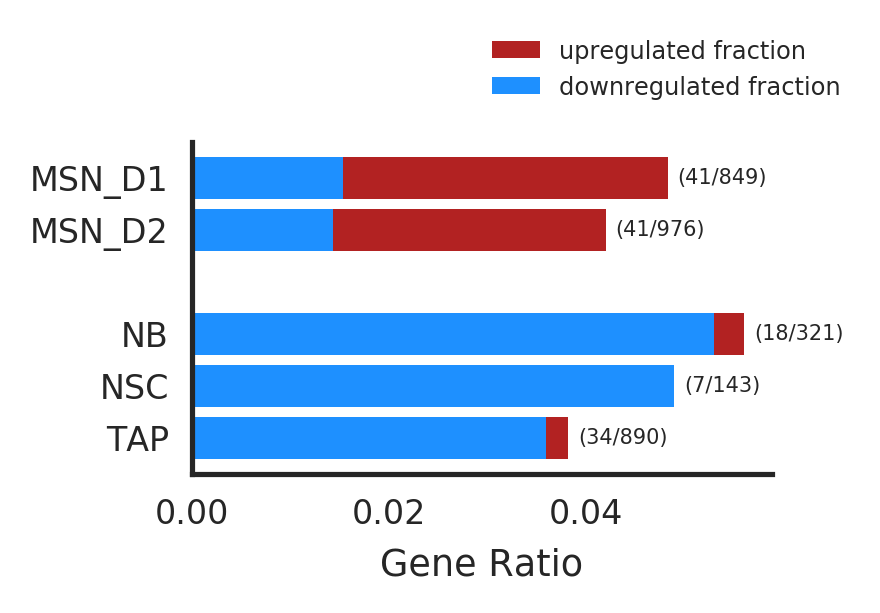

In [315]:
fig,ax=plt.subplots(dpi=300, figsize=(3,2.2))
df_geneRatio = pd.DataFrame(dixio).T.sort_values(by=0,ascending=True)
df_geneRatio = df_geneRatio.loc[["cl14_TAPs",'cl17_NSCs',"cl13_Neuroblasts","cl8_D2_MSNs","cl7_D1 MSNs"]]#.sort_values(by=0,ascending=True)
df_geneRatio.index = ["TAP","NSC","NB", "MSN_D2","MSN_D1"]
ax.barh([0,1,2,4,5],df_geneRatio[0], color='firebrick', label="upregulated fraction")
ax.barh([0,1,2,4,5],df_geneRatio[3],color='dodgerblue', label="downregulated fraction")

for i,j in zip(range(df_geneRatio.shape[0]),[0,1,2,4,5]):
    ax.annotate("({}/{})".format(int(df_geneRatio[2].values[i]),int(df_geneRatio[1].values[i])), (df_geneRatio[0].values[i]+0.001,j-0.1), size=5)


ax.set_yticks([0,1,2,4,5])
ax.set_yticklabels(df_geneRatio.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Gene Ratio")
ax.legend(loc=(0.5,1.1), fontsize="xx-small", frameon=False)
plt.tight_layout()
plt.savefig("../FIGURES/intersect_DEG-NPC48h-SC-RAJEWSKY.pdf")

### TAP: TRANSIENT AMPLIFYING PROGENITORS
### NSC: NEURAL STEM CELLS
### NB: NEUROBLASTS
### MSN: MEDIUM SPINY NEURONS

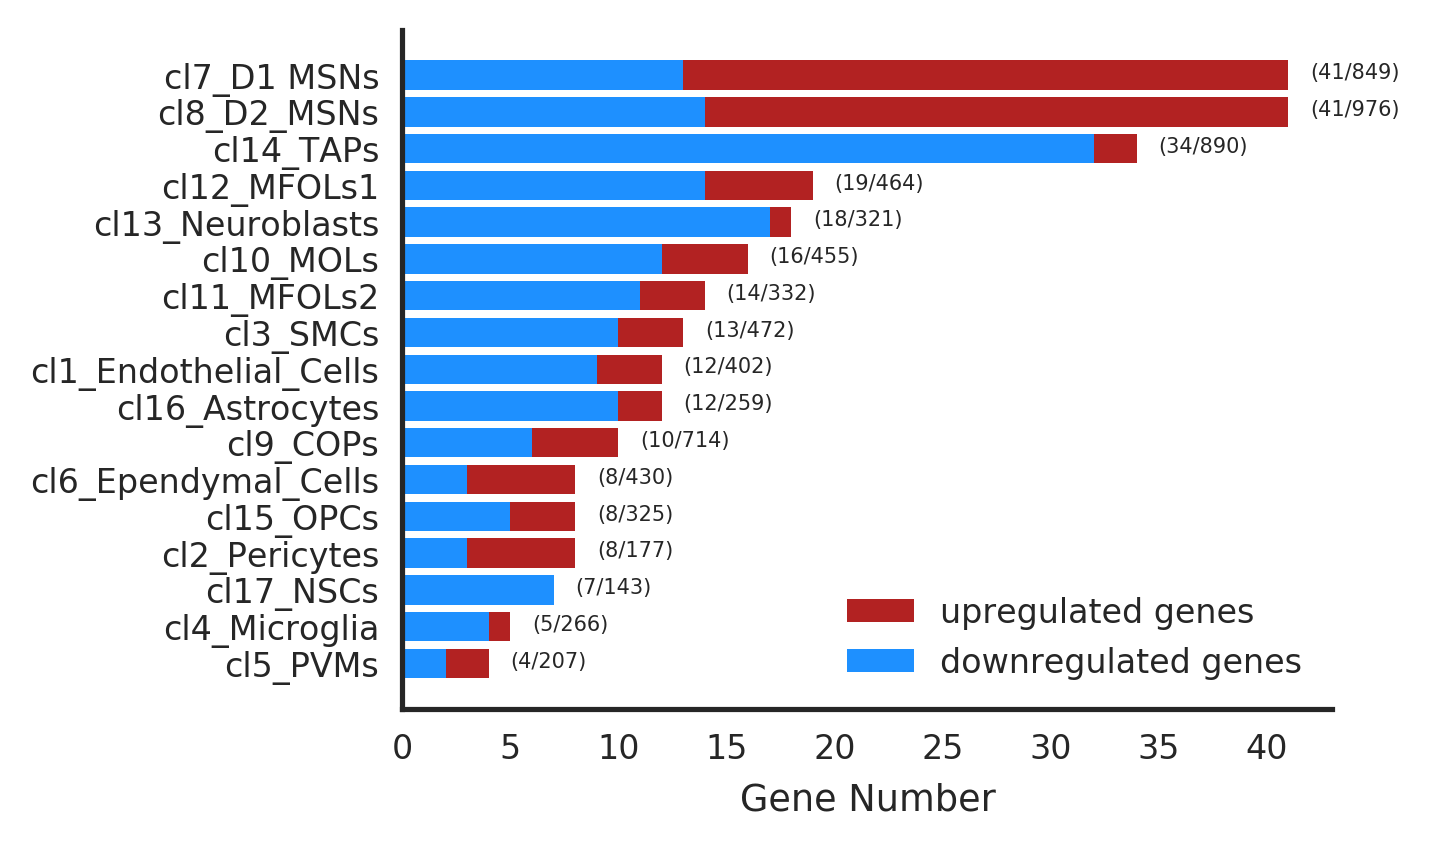

In [235]:
fig,ax=plt.subplots(dpi=300, figsize=(4,3))
df_geneRatio = pd.DataFrame(dixio).T.sort_values(by=2,ascending=True)
df_geneRatio
ax.barh(range(df_geneRatio.shape[0]),df_geneRatio[2], color='firebrick', label="upregulated genes")
ax.barh(range(df_geneRatio.shape[0]),df_geneRatio[6],color='dodgerblue', label="downregulated genes")

for i in range(df_geneRatio.shape[0]):
    ax.annotate("({}/{})".format(int(df_geneRatio[2].values[i]),int(df_geneRatio[1].values[i])), (df_geneRatio[2].values[i]+1,i-0.1), size=5)


ax.set_yticks(range(df_geneRatio.shape[0]))
ax.set_yticklabels(df_geneRatio.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Gene Number")
ax.legend()

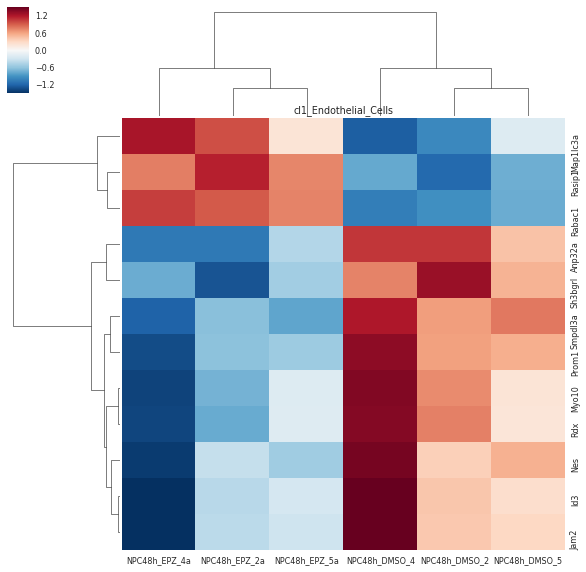

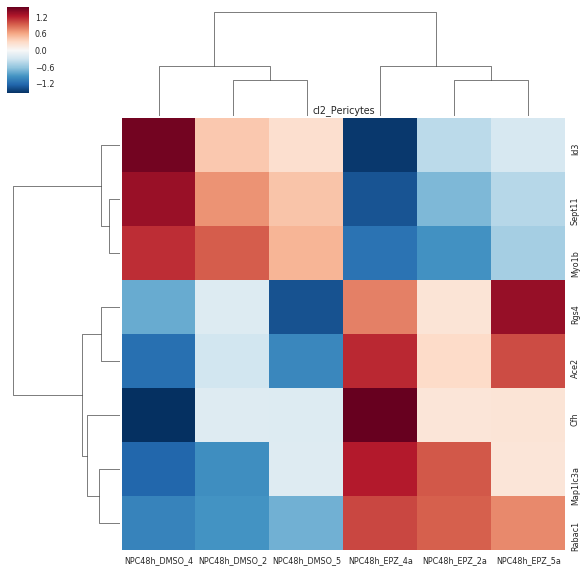

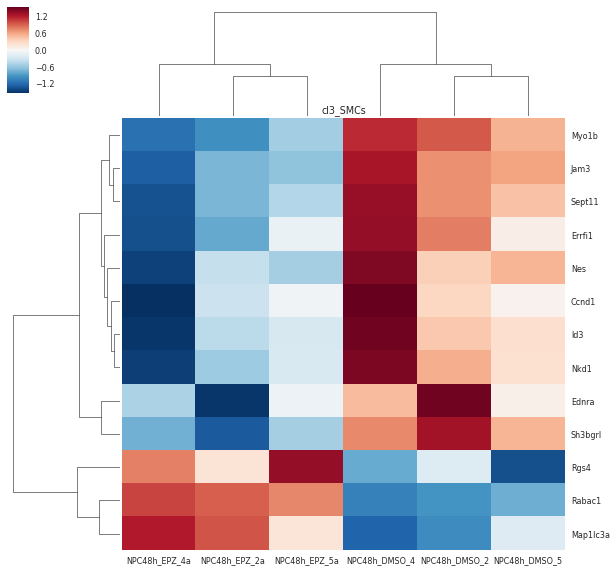

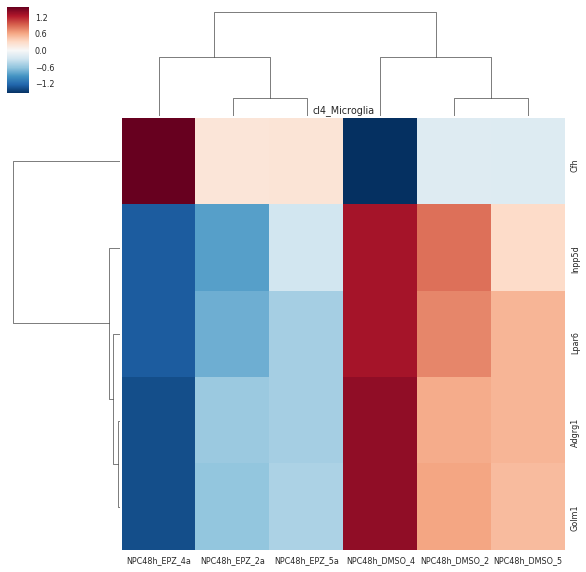

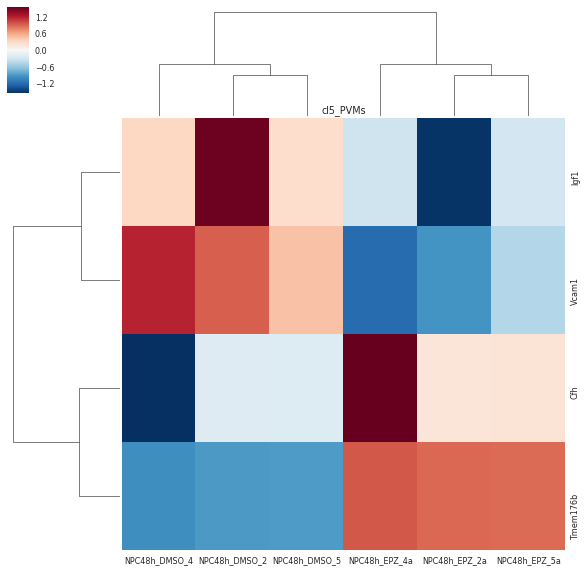

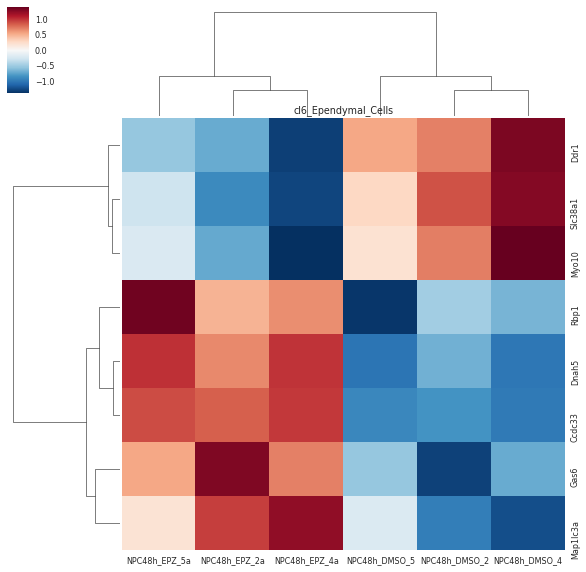

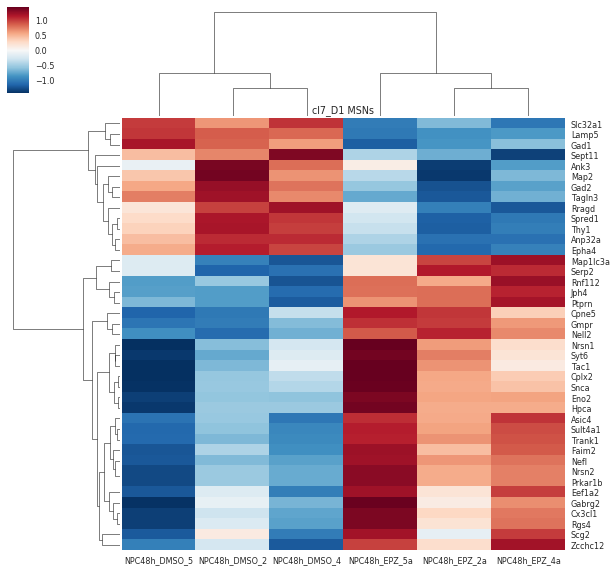

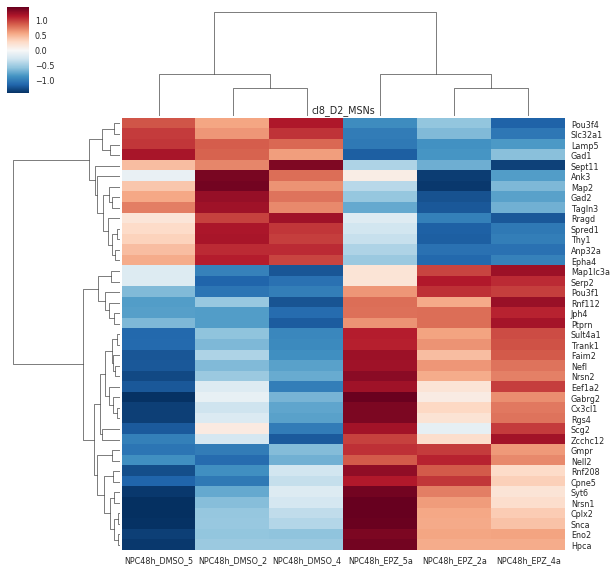

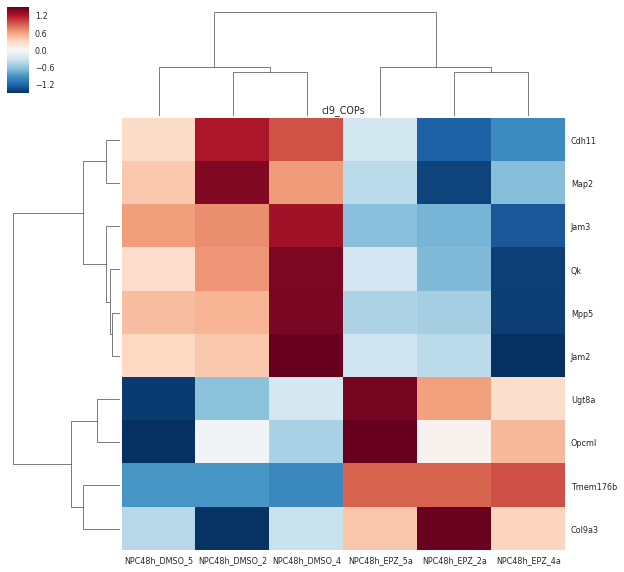

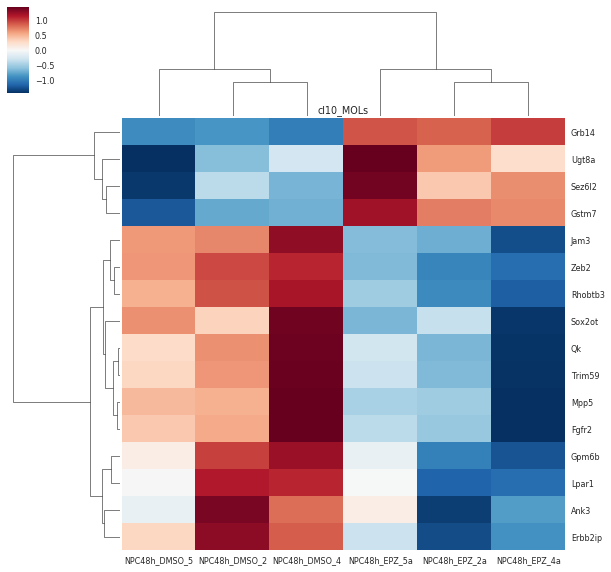

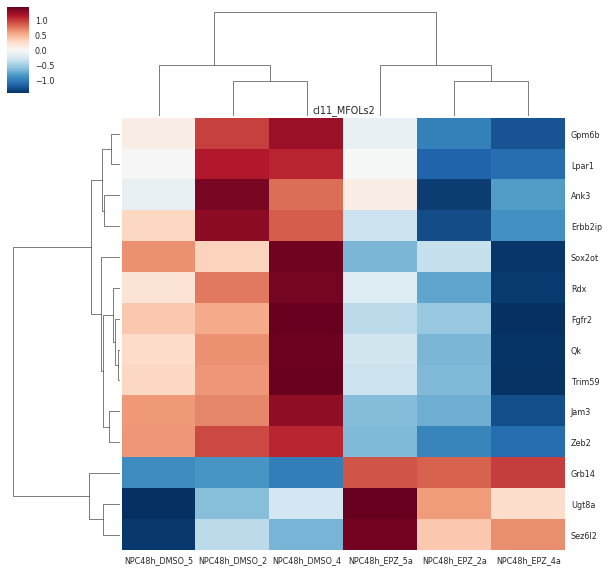

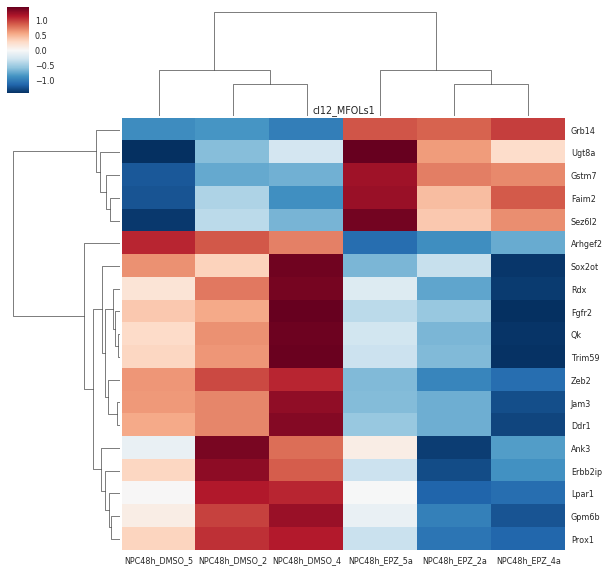

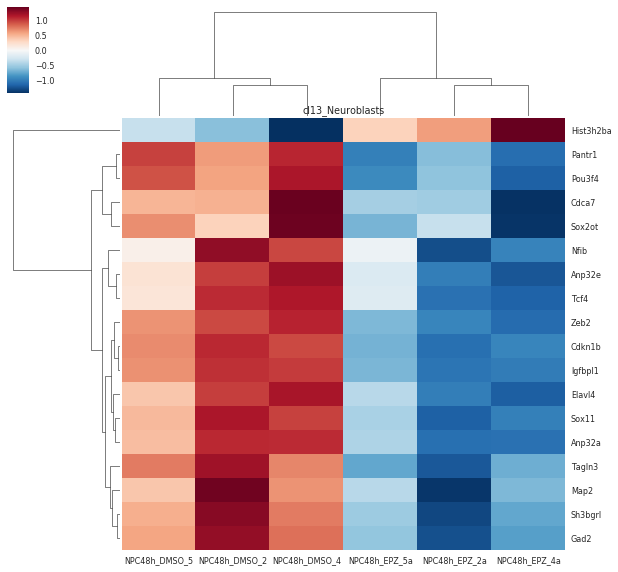

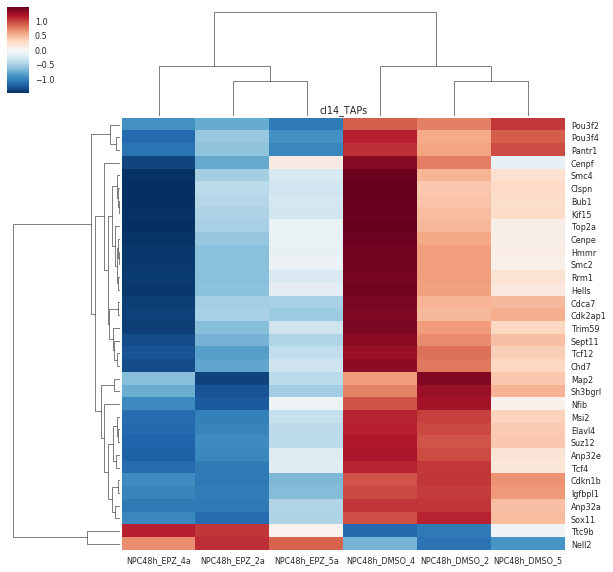

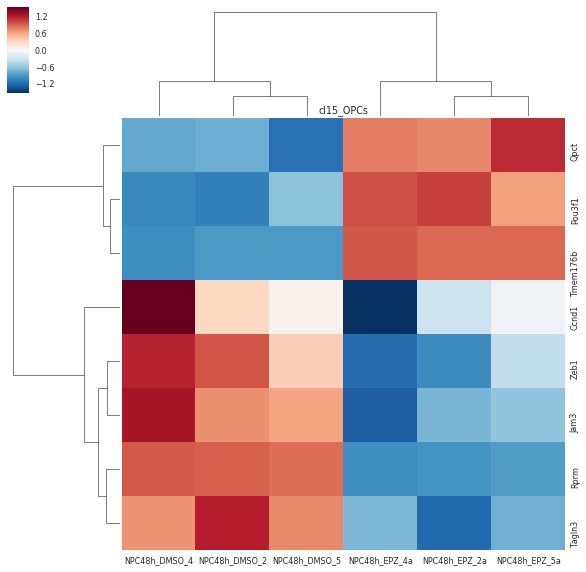

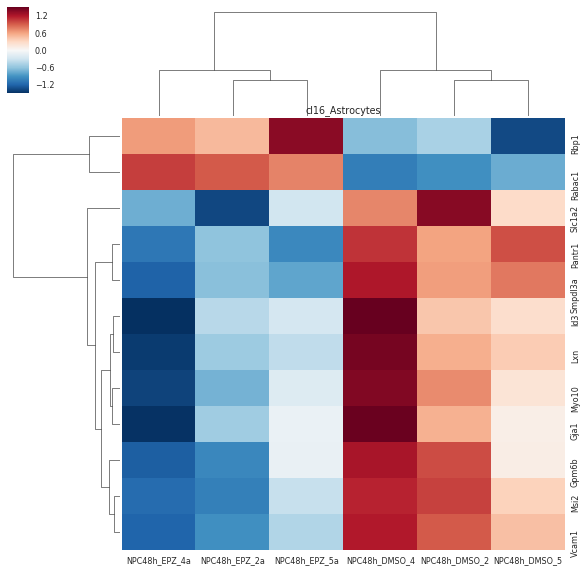

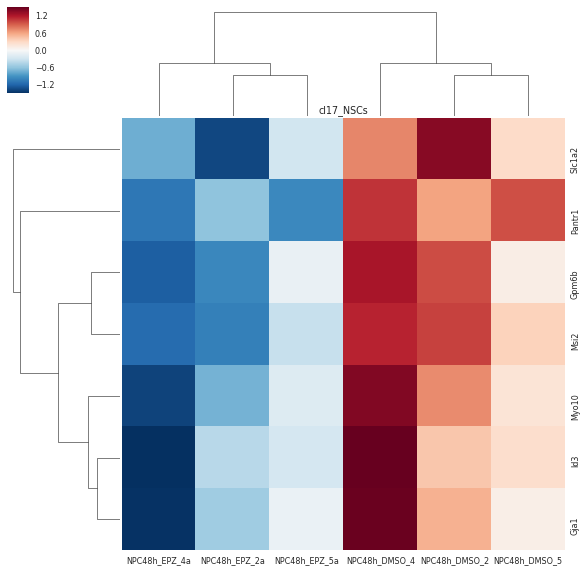

In [215]:
tpm_npc_batch.index = [tr_ens[i] if i in tr_ens else i for i in tpm_npc_batch.index]
tpm_npc_batch
for i in dixio.keys():
    
    genes_down  = list(dixio[i][-1])
    x = tpm_npc_batch.loc[genes_down].dropna()
    #print(i)
    g = sns.clustermap(x, z_score=0, cmap="RdBu_r")
    g.ax_heatmap.set_title(i)

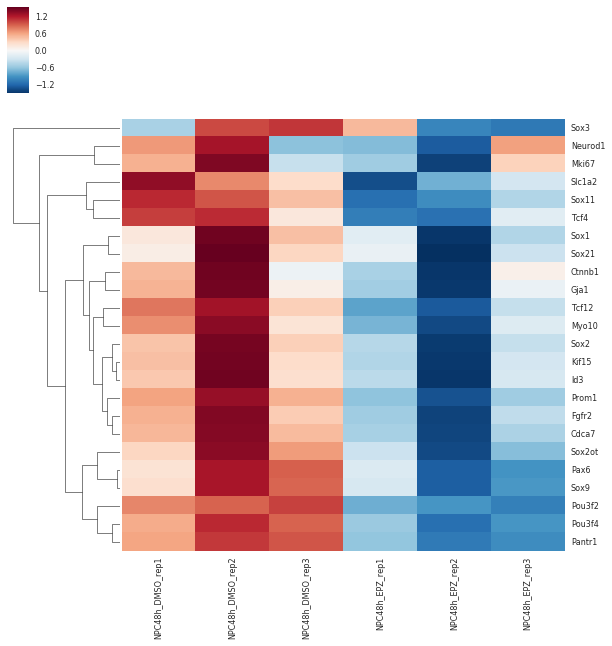

In [327]:
### CREATE HEATMAP OF PROGENITOR MARKERS ###
### THE LIST IS MANUALLY CURATED BASED ON TWO SINGLE CELL PAPERS and one review:
### Single-cell transcriptomic analysis of mouse neocortical development;
### Single-Cell Transcriptomics Characterizes Cell Types in the Subventricular Zone and Uncovers Molecular Defects Impairing Adult Neurogenesis;
### Molecular Biomarkers for Embryonic and Adult Neural Stem Cell and Neurogenesis;


marker_genes = ["Neurod1","Sox11","Sox2","Pax6","Pou3f2","Pou3f4","Sox9","Fgfr2","Ctnnb1","Sox1","Sox3","Sox21",
                "Pantr1","Cdca7","Sox2ot","Kif15","Prom1","Tcf12","Tcf4","Myo10","Id3","Slc1a2","Gja1","Mki67"]

tpm_npc_batch_ = tpm_npc_batch.copy() 
tpm_npc_batch_.index = [tr_ens[i] if i in tr_ens else i for i in tpm_npc_batch_.index]
tpm_npc_batch_ = tpm_npc_batch_[["NPC48h_DMSO_2","NPC48h_DMSO_4","NPC48h_DMSO_5","NPC48h_EPZ_2a","NPC48h_EPZ_4a","NPC48h_EPZ_5a"]]
tpm_npc_batch_.columns = ["NPC48h_DMSO_rep1","NPC48h_DMSO_rep2","NPC48h_DMSO_rep3","NPC48h_EPZ_rep1","NPC48h_EPZ_rep2","NPC48h_EPZ_rep3"]
res = sns.clustermap(tpm_npc_batch_.loc[marker_genes], z_score=0, cmap="RdBu_r", center=0, col_cluster=False)



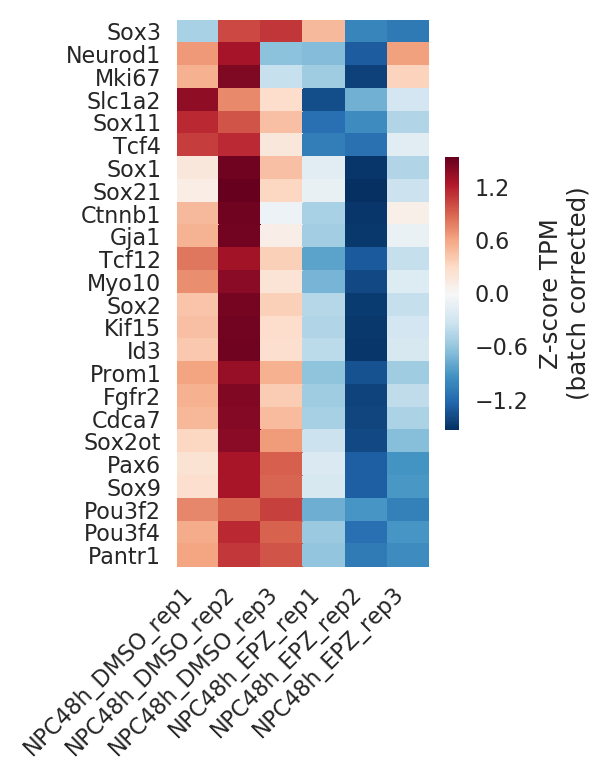

In [344]:
fig,ax = plt.subplots(dpi=200,figsize=(3,4))
sns.heatmap(res.data2d, cmap="RdBu_r",ax=ax, cbar_kws={'label': 'Z-score TPM\n(batch corrected)', "shrink": 0.5})
plt.xticks(rotation=45,ha="right") 
plt.tight_layout()
plt.savefig("../FIGURES/NPC_heatmap_progenitor_markers.pdf")